# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; and
5. Create meaningful visualizations to analyze the data!
---

## Important Dates

- Homework release: Fri 2 Oct 2020
- **Homework due**: Fri 16 Oct 2020, 23:59
- Grade release: Fri 23 Oct 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the `data` folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in either comments or markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.



## Context

The coronavirus pandemic has led to the implementation of unprecedented non-pharmaceutical interventions ranging from case isolation to national lockdowns. These interventions, along with the disease itself, have created massive shifts in people’s lives. For instance, in mid-May 2020, more than one third of the global population was under lockdown, and millions have since lost their jobs or have moved to work-from-home arrangements.


Importantly, the disease has shifted people's [needs](https://en.wikipedia.org/wiki/Toilet_paper), [interests](https://en.wikipedia.org/wiki/TikTok), and [concerns](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Switzerland) across the globe.

In this homework, we will take a deep dive into Wikipedia data and try to uncover what changed with the pandemic. More specifically, we will be focusing on Wikipedia pageviews, that is, how many people read each article on Wikipedia each day.
A nice graphical user interface for playing with Wikipedia pageviews is available [here](https://pageviews.toolforge.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&range=latest-20&pages=Cat|Dog).
Also, the Wikimedia Foundation releases dump files with the number of pageviews per article across all Wikimedia websites, including Wikipedia in all its language editions [(amazing, right?)](https://dumps.wikimedia.org/other/pagecounts-ez/). 

#### But wait, what is a pageview?

> A pageview or page view, abbreviated in business to PV and occasionally called page impression, is a request to load a single HTML file (web page) of an Internet site. On the World Wide Web, a page request would result from a web surfer clicking on a link on another page pointing to the page in question. (Source: [Wikipedia article "Pageviews"](https://en.wikipedia.org/wiki/Pageview))

Pageviews in Wikipedia can tell us that people are looking for certain information online. Analyzing how the volume and the distribution of pageviews changed can tell us about how the behavior of Wikipedia readers has changed.

In this homework, you will take a deep dive into analyzing Wikipedia pageview logs and uncover shifts in interests associated with the current pandemic.

---

## The data

First, you need to download a **meraviglioso** dataset from the Italian Wikipedia that we prepared for you. The structure of the data is described next. 

**The dataset is available in the `data` directory pushed to the same GitHub repo as the homework**. Inside of the data directory, you will find three files:

### `articles.tsv.gz`

This is a tab-separated file containing daily pageviews for a subset of the articles from Italian Wikipedia. It is compressed! Each row corresponds to a different article, and each column (except the first) corresponds to the number of pageviews this article received on a given day. The example below shows the structure for two of the things [Kristina Gligorić](https://kristinagligoric.github.io/), one of your TAs, likes the most on her Pizza:

**Example:**
~~~
index       2018-01-01 00:00:00    2018-01-02 00:00:00 (...)
Formaggio   100                    101                 (...)
Ananas      12                     54                  (...)
(...)       (...)                  (...)
~~~


### `topics.jsonl.gz`

This is a classification of which topics an article belongs to, according to a model released by the Wikimedia Foundation (the classes are derived from this [taxonomy](https://www.mediawiki.org/wiki/ORES/Articletopic)). Importantly, this file was obtained from English Wikipedia, while the previous one contains articles from the Italian Wikipedia. This is important because article titles in the Italian Wikipedia are in Italian, while article titles in the English page are in English (duh!). In any case, each line contains a .json object with
the English name of the article (name);
1. the English name of the article (`name`);
2. a set of fields related to topics themselves. Each of these fields is set as either `True` (if the article belongs to this topic) or `False` (if it does not). Notice that the same article may belong to multiple topics. 

**Example:**
~~~
{"index": "Cheese", "Culture.Food and drink": True, "Culture.Literature": False (...)}
{"index": "Pineapple", "Culture.Food and drink": True, "Culture.Literature": False (...)}
(...)
~~~

 
### `mapping.pickle`

This is a `.pickle` file, that is, a serialized Python object. You can read about Python pickles  [here](https://wiki.python.org/moin/UsingPickle), 
but in short: the default Python library `pickle` allows you to save and load Python objects to and from disk. This is one object saved via the pickle library: a Python dictionary containing a mapping between the English names and the Italian names of Wikipedia articles:

**Example:**
~~~
{
    "Cheese": "Formaggio",
    "Ananas": "Pineapple"
    (...)
}
~~~
---


## _Step 1:_ Loading the data

---
### **Task 1**

Your first task is to load all these datasets into memory using pandas and pickle. 
**You should load the files compressed.**

Here, the files at hand are rather small, and you could easily uncompress  the files to disk and work with them as plain text. 
Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, this will often not be the case.

Then, working with compressed files is key so that you don't receive e-mail from your (often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your datasets. 
Another big advantage of compressing files is to simply read files faster. You will often find that reading compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading and writing to the disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

 
---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). Check the `error_bad_lines` parameter on `read_csv`.

---
**Implementation notes**

In the first task we use different built-in functions from pandas to decompress, parse and load the various datasets according to their type.

In `articles` dataset we use the "\t" separator as the dataset is tab-separated, we set the parameter *error_bad_lines* to *False* to exclude lines with different size of columns and also, we use the index column as the dataframe index.

In `topics` dataset we enable the *lines=True* option as each line in the dataset is a separate json object and we set the dataframe index to the index json field.

Finally, we print the shape of each dataset.

---

In [1]:
import pandas as pd
import pickle

### ~ 1.1
articles = pd.read_csv('data/articles.tsv.gz', compression='gzip', sep='\t', error_bad_lines=False, index_col='index') # Setting 'index' column as index
topics = pd.read_json('data/topics.jsonl.gz', compression='gzip', lines=True).set_index('index') # Setting 'index' column as index
mapping = pd.read_pickle('data/mapping.pickle')

print('Shape of articles dataframe: ', articles.shape)
print('Shape of topics dataframe: ', topics.shape)
print('Mapping dictionary key-value pairs: ', len(list(mapping.values())))

b'Skipping line 7: expected 944 fields, saw 945\n'


Shape of articles dataframe:  (56791, 943)
Shape of topics dataframe:  (35611, 64)
Mapping dictionary key-value pairs:  35611


## _Step 2:_ Filtering the data

---
### **Task 2**

Oh no! Something seems wrong with your dataframe!
It seems that some of the lines in the `articles.tsv.gz` are weird! 
They have titles in the format `"Discussione:name_of_the_page"`.

Unsure of what they mean, you ask about them in the [Wiki-research mailing list](https://lists.wikimedia.org/mailman/listinfo/wiki-research-l).
Twenty minutes later a kind internet stranger comes with an answer! 
She tells you that these are talk pages, where people discussing what should and should not be in the article (in fact it can be pretty funny to read, eg, [you can read Italians debating about pizza](https://it.wikipedia.org/wiki/Discussione:Pizza))

After understanding what they are, your task is now to filter these lines using `pandas`! After all, we are interested in pageviews going towards articles! Not discussion pages!

---

**Hint**: There is one of them in the position \#180 of the dataframe, if you want to check it!

---
**Implementation notes**

In order to filter the talk pages we use the string function *contains()* and within the matching string we check also for the ":" character to avoid cases where "Discussione" is indeed a word of the title. Then, we update the `articles` dataframe according to the boolean operation. We observe that the initial dataset contained 1000 talk discussions.

---

In [2]:
### ~ 2.1
articles = articles[~articles.index.str.contains('Discussione:')]
print('Shape of articles dataframe after the removal of talk pages: ', articles.shape)

Shape of articles dataframe after the removal of talk pages:  (55791, 943)


## *Step 3*: Understanding the data

---
### **Task 3.1**
Data cleaning is hard huh? But now that this headache is behind us we can go on to explore our data.

Let's begin with some basic stats. It is always important to do this as a sanity check.

You should:

1. Start by calculating how many topics and articles there are. Also, while you are at it, print the names of the topics to get a grasp of what they are about. 
2. Calculate the average daily number of pageviews in the dataset.
3. **Discuss:** As previously mentioned, your data is a sample of _some_ (and not all) Wikipedia articles! Estimate (roughly) what percentage of Italian Wikipedia articles are in your dataset comparing your daily average pageview numbers with the official statistics (which can be found [here](https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2020-01-01&end=2020-09-21&sites=it.wikipedia.org)). Notice that we are focusing on the desktop version of Wikipedia.

---
**Hint**: topics are in the columns of the topic file!

---
**Implementation notes**
1) For the calculation of the number of topics and articles we use the shape function from pandas dataframes which provides the number of columns and rows for a given dataframe. Furthermore, we observe that topic names include information about the complete taxonomy (i.e. both general and specific categories) within a dot separated format. Here it is to be noted that we already converted the column 'index' to be the index of our dataframe and is therefore not appositely counted towards the number of topics.

2) In order to calculate the average daily number of pageviews, we first sum the pageviews per day and then we calculate the mean.

---

In [3]:
### ~ 3.1.1
n_articles = articles.shape[0]
n_topics = topics.shape[1]

print('Number of articles: ', n_articles)
print('Number of topics: ', n_topics)
print('Name of topics:\n', '\n'.join(list(topics.columns)))

Number of articles:  55791
Number of topics:  64
Name of topics:
 Geography.Regions.Asia.Central Asia
Geography.Regions.Europe.Eastern Europe
History and Society.Military and warfare
Culture.Media.Television
History and Society.Education
Culture.Media.Books
Geography.Regions.Africa.Africa*
Culture.Visual arts.Architecture
Culture.Biography.Women
Geography.Regions.Americas.North America
STEM.STEM*
Culture.Performing arts
Culture.Literature
History and Society.Politics and government
Geography.Regions.Africa.Northern Africa
STEM.Earth and environment
Geography.Regions.Africa.Central Africa
STEM.Medicine & Health
STEM.Libraries & Information
Geography.Regions.Europe.Europe*
Geography.Regions.Europe.Western Europe
Culture.Media.Radio
STEM.Space
Culture.Visual arts.Comics and Anime
STEM.Technology
Culture.Internet culture
Culture.Media.Software
Geography.Regions.Asia.East Asia
Geography.Regions.Europe.Southern Europe
STEM.Biology
Culture.Food and drink
History and Society.Business and econo

In [4]:
### ~ 3.1.2
mean_daily_articles = articles.sum(axis=0).mean()

print(f'Average daily number of pageviews: {mean_daily_articles:.2f}')

Average daily number of pageviews: 324267.67


In [5]:
### ~ 3.1.3
### Your text (and code if necessary) here! ###

# 1) First of all we have to find the time period where pageviews were monitored so that we can compare for the same dates:
print('Pageviews monitored from %s to %s' %(articles.columns[0],articles.columns[-1]))

Pageviews monitored from 2018-01-01 00:00:00 to 2020-07-31 00:00:00


2) Then, we use the following link to retrieve the official statistics. In this link we have filled the fields with the correct values.

- Fields: [Dates: 1/1/2018 - 7/31/2020, Date type = Daily, Metric = Pageviews, Platform = Desktop, Projects = it.wikipedia.org]
- Link: https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2018-01-01&end=2020-07-31&sites=it.wikipedia.org

In [6]:
# 3) We observe that the total number of pageviews according to the website is 5,731,987.
per_subsample_wiki = mean_daily_articles / 5731987
print('Our sample is around', round(per_subsample_wiki * 100, 2), '% of the Italian wikipedia')

Our sample is around 5.66 % of the Italian wikipedia



### **Task 3.2**

Now that we have a better understanding of the data, let's look at some articles to get a feeling of what is happening. 

Your task is to:

1. Find all articles whose names contain the sequence of characters `"virus"` (case insensitive) and that received least 7,000 pageviews across the entire period (no point in zooming on very insignificant articles);
2. Find a way to nicely visualize __each__ one of the time-series (in a single plot, which may have multiple panels; in the lecture, Bob referred to these as “small multiples); Your visualization should allow one to see overall trends across each of the different articles and depict the overall trends, with the least noise possible. Additionally, highlight two specific dates in your plot: 31 January ([first case reported in Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#First_confirmed_cases)) and 21 February ([when multiple cases were confirmed in northern Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#Clusters_in_northern_Italy)).
4. **Discuss**: What did you observe? Did all the articles behave similarly?

---

**Hint**: The column dates are currently strings which are not very plot friendly. You can turn them into datetime objects using: 

~~~python
your_dataframe_name.columns = pd.to_datetime(your_dataframe_name.columns)
~~~

Notice that this only works if you have only date-related columns. Fortunately, if you get rid of the `index` column by making it a real pandas index, things should work just fine.

**Hint**: Choose your axes wisely!



#### Implementation notes

As suggested in the hint, we first converted the columns to datetime objects. Subsequently, we created a new column (sum_pageviews) where we sum the total pageviews per article over the total time period. To select the articles containing the word virus, we search the titles using 'virus', case insensitive and as substring. We then filter out the selected pages that have less than 7000 total pageviews using the previously created column. 

In [7]:
### ~ 3.2.1
articles.columns = pd.to_datetime(articles.columns) 
articles['sum_pageview'] = articles.sum(axis=1) # Create a column sum_page view, this is also used in exercise 3.3.1

virus_articles = articles[articles.index.str.contains('virus', case=False, regex=True)]
virus_articles = virus_articles[virus_articles['sum_pageview'] >= 7000] 
virus_articles


,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,2018-01-10 00:00:00,...,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00,sum_pageview
index,,,,,,,,,,,,,,,,,,,,,
Virus_della_leucemia_felina,11,27,20,28,24,9,13,36,30,34,...,12,13,9,6,10,11,7,7,8,13861
Malattia_da_virus_Ebola,3,21,13,23,28,5,11,11,17,18,...,30,25,126,30,27,147,25,39,146,48530
Influenzavirus_A_sottotipo_H1N1,20,23,49,52,46,108,271,143,75,60,...,27,30,70,36,39,39,35,35,44,75362
Rhinovirus,6,9,12,22,13,12,21,18,19,15,...,10,10,13,6,14,10,8,9,14,15685
Virus_(informatica),26,70,74,66,86,44,67,94,107,168,...,38,21,18,30,24,33,28,22,17,78334
Herpesvirus_umano_3,2,5,5,14,6,13,9,12,11,5,...,9,10,5,7,8,13,5,9,8,8566
Antivirus,19,31,26,27,42,30,24,54,45,80,...,33,25,14,14,19,23,23,22,12,42536
Virus_respiratorio_sinciziale_umano,6,11,18,18,15,14,9,21,17,19,...,10,10,4,4,9,4,12,5,7,10103


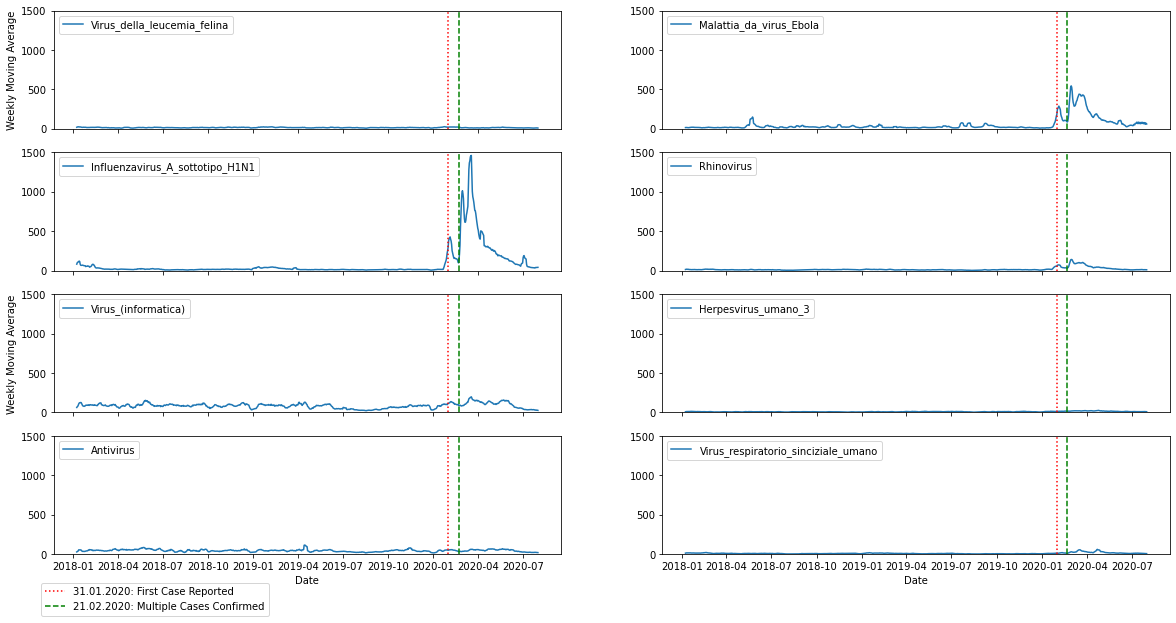

In [8]:
### ~ 3.2.2
import matplotlib.pyplot as plt
import numpy as np 


#Preparing Data Frame for the plot
virus_articles_plots = virus_articles.drop(columns=['sum_pageview']) #drop the sum of page views
virus_articles_plots = virus_articles_plots.T #Transpose the DF so that one column is a time series of one virus
virus_kinds = virus_articles_plots.columns

#Here I calculate a weekly floating average: The average amount of page views for the last 7 days
#ToDo: iterate through virus kinds and through values. sum(pageview per day of last seven days)/7, creat new DF with values of moving average
virus_weekly_moving_average = pd.DataFrame()
for col in range(len(virus_kinds)):
    temp_list = []
    for i in range(virus_articles_plots.shape[0] - 7):
        temp_list.append(sum(virus_articles_plots.iloc[i + p, col] for p in range(7)) / 7)
    virus_weekly_moving_average[virus_kinds[col]] = temp_list #+'_moving_average'

    
#Create date index: Attetion we calculate the floating average of the past 7 days, therefore omit first 7 dates
virus_weekly_moving_average['index'] = virus_articles_plots.index[7:]
virus_weekly_moving_average = virus_weekly_moving_average.set_index('index')



#Create our subplots
fig, axs = plt.subplots(4, 2, sharex=True, figsize=(20,10))

#In this loop I fill my plots up
for n, virus in enumerate(virus_weekly_moving_average.columns):
    vir = axs[int(np.floor(n / 2)), n % 2].plot(
        virus_weekly_moving_average.index,
        virus_weekly_moving_average[virus]
    ) # Ploting the basic data: x=date, y=weekly_moving average
    leg = axs[int(np.floor(n / 2)), n % 2].legend(
        (vir), (virus,), fancybox=True, loc='upper left'
    ) # Labeling the virus kind 
    l1 = axs[int(np.floor(n / 2)), n % 2].axvline(
        x=pd.to_datetime("2020-01-31"), label='31.01.2020: First Case Reported',  c='r', ls=':'
    ) # Mark two dates with dotted lines and label them according to their meaning
    l2 = axs[int(np.floor(n / 2)), n % 2].axvline(
        x=pd.to_datetime("2020-02-21"), label='21.02.2020: Multiple Cases Confirmed', c='g', ls='--'
    ) # Use different colors for lines
    #axs[int(np.floor(n/2)), n%2].set_yscale('log') # Log scale of y axis: Does not produce informative results, therefore use linear scale 
    axs[int(np.floor(n / 2)), n % 2].set_ylim([0,1500]) # Set common y axis range so that plots are comparable 
    
    if n % 4 == 0: # Label the y axis, but not everone because that is very redundant
        axs[int(np.floor(n / 2)), n % 2].set_ylabel('Weekly Moving Average')
    if n - 6 >= 0: # Label the x axis, but only the last two. Very easy on the eye
        axs[int(np.floor(n / 2)), n % 2].set_xlabel('Date')
    
    
# Now use one legend to describe the two dotted lines (special dates), to avoid redundancy
axs[3, 1].legend(handles=[l1, l2],loc='upper center', 
             bbox_to_anchor=(-1.0, -0.2), fancybox=True)
plt.gca().add_artist(leg)


### Discussion ~ 3.2.3
**Interpretation of Results:**
- Most of the virus Wikipedia pages have a relatively constant and low amount of pageviews, with two outliers: the H1N1 virus page and the page conencted to the Ebola virus.
- The H1N1 virus page and the Ebola virus page have very similar trends (but with different magnitudes) around the two points of interest (First Covid case, Multiple Cases Reported).
- We assume that this is connected to the fact that both of those viruses (in contrast to the other ploted viruses) were two medical viruses which were active in europe in the past 10 years. Furthermore, both those viruses are easily transmitted by breathing. Therefore, people might want to compare their outbreakes to the recent Covid outbreak.
- This is visible by the fact that on the right of the first reported Covid case there is a visible peak and after several confirmed cases there is an even greater peak. Therefore around those two events people might have decided to do research on comparable viral outbreakes in the recent past. This would explain the two peaks.

**Inplementation Notes:**
- We chose to use a linear scale (in contrast to a log scale) to depict our results. A linear scale is preferable because one can see clearly the peaks and the extent of the peak. We want to really see that there is a huge peak in pageviews around our two dates (This wouldn't be very clear with a log-y scale)
- A Floating Seven Day Average was used to reduce noise in our plots. The plots get way smoother and trends are very nicely recognizable
- A uniform color schema was used (trends in blue, special dates red and green). This makes it easy on the eye and the plots are easy to compare
- Redundancy was avoided (axes are not labeled every time, only one label for the dates), but at the same time all information is clearly labeled




### **Task 3.3**

Before we move on, let's make a final sanity check and analyze the distribution of pageviews over all articles in our dataset. You are given a function to calculate the **cumulative distribution function** (CDF) of a sample. The CDF is a function f(x) associated with a data sample. For each value x, f(x) represents the percentage of elements in your sample that have values smaller or equal to x (read more about it [here](https://en.wikipedia.org/wiki/Empirical_distribution_function)).
Your task is to:

1. Calculate the CDF of the distribution of pageviews across all days over articles. That is, a) calculate the total number of pageviews each article has received and then, b) calculate the CDF for these values.


2. Now plot this function using different scales for the x- and y-axis. You should plot it in 4 different ways:

    a. x-axis on linear scale, y-axis on linear scale
    
    b. x-axis on log scale, y-axis on linear scale
    
    c. x-axis on linear scale, y-axis on log scale
    
    d. x-axis on log scale, y-axis on log scale
    
3. **Discuss:** There is a pretty odd fact about the distribution of our data! Can you spot it and describe it? Which of the different plots (a-d) allows you to find this oddity? Why isn't this visible in the other plots?

---

**Hint:** You can use `plt.xscale` and `plt.yscale`.

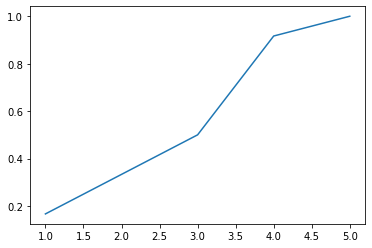

In [9]:
# This function is being given to you with a usage example :)! Make good use!

import numpy as np

def get_cdf(vals):
    # Input:
    # -- vals: an np.array of positive integers
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals);
    # -- y: an array containing the (empirically calculated) probability that vals <= x
    
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    y = y
    x = list(range(1, max(vals) + 1))
    return x, y  

vals = np.array([1,2,3,4,1,2,4,3,4,4,5,4])
x, y = get_cdf(vals)
plt.plot(x, y)
plt.show()

Minimum number of pageviews: 291
Maximum number of pageviews: 1152767


Text(0.5, 0, 'N. of articles')

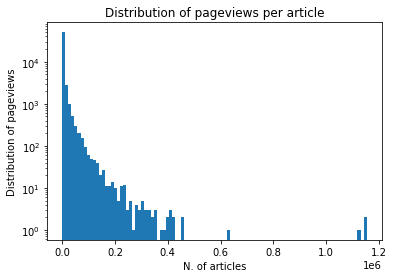

In [10]:
### ~ 3.3.1
# The total amount of page views was already calculated in exercise 3.2.1) --> use the existing column
x, y = get_cdf(np.asarray(articles.sum_pageview)) # Use the given function


# This a additional exploration of our data. Please ignore!
# --> to obtain the minimum and to look at the distribution of sum pageviews per article
print('Minimum number of pageviews:', min(articles.sum_pageview))
print('Maximum number of pageviews:', max(articles.sum_pageview))
plt.hist(articles.sum_pageview, bins=100)
plt.yscale('log')
plt.title('Distribution of pageviews per article')
plt.ylabel('Distribution of pageviews')
plt.xlabel('N. of articles')

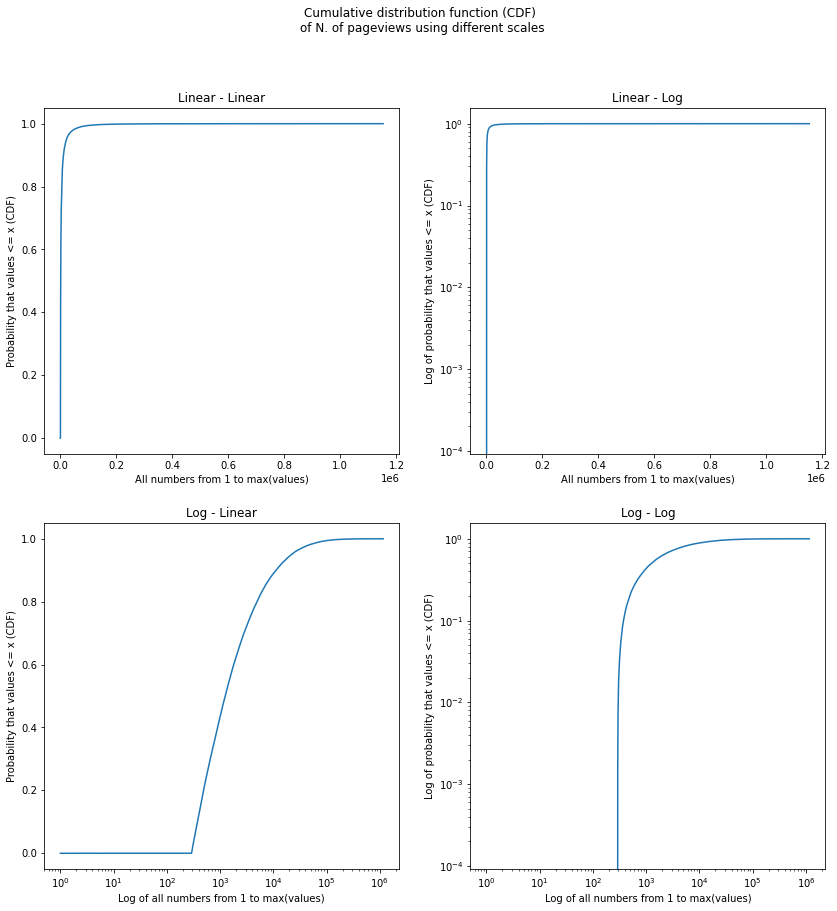

In [11]:
### ~ 3.3.2
fig, ax = plt.subplots(2, 2, figsize=(14,14))

plt.suptitle('Cumulative distribution function (CDF) \nof N. of pageviews using different scales')

#Name, label and plot Linear - Linear
ax[0,0].plot(x, y)
ax[0,0].set_title('Linear - Linear')
ax[0,0].set_xlabel('All numbers from 1 to max(values)')
ax[0,0].set_ylabel('Probability that values <= x (CDF)')


#Name, label and plot Log - Linear
ax[1,0].plot(x, y)
ax[1,0].set_xscale('log')
ax[1,0].set_title('Log - Linear')
ax[1,0].set_xlabel('Log of all numbers from 1 to max(values)')
ax[1,0].set_ylabel('Probability that values <= x (CDF)')

#Name, label and plot Linear - Log
ax[0,1].plot(x, y)
ax[0,1].set_yscale('log')
ax[0,1].set_title('Linear - Log')
ax[0,1].set_xlabel('All numbers from 1 to max(values)')
ax[0,1].set_ylabel('Log of probability that values <= x (CDF)')

#Name, label and plot Log - Log
ax[1,1].plot(x, y)
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_title('Log - Log')
ax[1,1].set_xlabel('Log of all numbers from 1 to max(values)')
ax[1,1].set_ylabel('Log of probability that values <= x (CDF)')

plt.show()

### Discussion ~ 3.3.3
**Analysis**
- **Linear - Linear:** Our first plot shows us that the big bulk of our articles has only a few views, meaning if you surpass a certain small number, most articles have less pageviews than this number. But there seem to be some 'super star' articles which have a lot of views. However, this plot is dificult to read and not very informative. We cannot see the oddity, because the oddity happens in the small values of the x-axis. Those small values cannot be discerned with this linear axis (i.e.: the x values increase too fast)
- **Log - Linear:** Our second plot is the most informative and shows also the oddity. The log x-axis gives a nice picture of how our data is actually distributed. Here we can also see our **oddity**: All pages have more cumulative views than a few hundreds minimum (to be exact 291). From this minimum on we then have a sharp increase (at around 5'000 already 80% of all pages are covered). In the end the curve flatens out with a very few articles which have around one million views.
*Our theory* why there is such a clear minimum of pageviews is that every page in wikipedia is certainly writen edited and controlled by a minimum number of people. Wikipedia has a strict policy of controlling and checking articles. Therefore each article will get read or checked by at least few hundreds of people

- **Linear - log** and **Log - Log:** Those Plots are pretty useless. This is because the values of the y axis are between 0 and 1. given that $lim(log(0)) \rightarrow \infty$ and $ log(1) = 0$, the y axis will show something between a very small value and zero. Therefore it is very hard to read the y scale and we do not obtain any additional information because of those plots. Our oddity is not noticeable in the *Linear - Log*  case because of the same reason of the first plot (the x values increase too fast). In the *Log - Log* the oddity can be spotted (steep increase at some small value), but given the useless y axis one has difficulties to really comprehend the meaning. 


## *Step 4*: Analyzing Overall Pageview Volume


---
### **Task 4.1**

So far we have seen anecdotal examples. Now let’s move to the big picture! How did Wikipedia pageviews change in general? To gain a better understanding of how Wikipedia’s overall pageview volume has changed during the pandemic, you should do the following:

1. Calculate and visualize the pageviews trends across summed across **all** articles in Italian Wikipedia for the year 2020. (and only for 2020!). 
2. **Discuss**: what regular pattern (something that repeats over and over) do you see in the data?
3. Pre-process the data to remove this regular pattern and make the overall trend clearer. Repeat the plot with the processed data.

---

**Hint**: A convenient way to use `.groupby` alongside dates is to use the [`pd.Grouper`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html) class. Basically, it allows you to group by date periods given frequencies determined by the parameter `freq`. To read how to specify different types of frequencies, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). Recall that, in order to turn an index, column index -- or pretty much anything -- into a timestamp, you can use  [`pd.to_timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_timestamp.html).

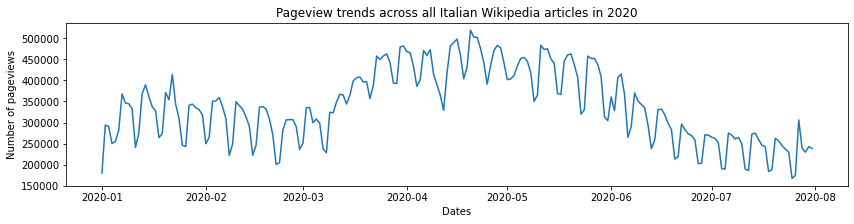

In [12]:
### ~ 4.1.1

# Filter sum_pageview column
articles_date_columns = articles.iloc[:,0:len(articles.columns)-1]

# Filter columns with date greater than 2020-01-01
date_columns_2020 = articles_date_columns.columns[articles_date_columns.columns >= pd.to_datetime('2020-01-01 00:00:00')]

# Calculate summed pageviews trends across all articles
pageviews_trends_2020 = articles[date_columns_2020].sum(axis=0)

plt.figure(figsize=(14,3))
plt.plot(pageviews_trends_2020)
plt.title('Pageview trends across all Italian Wikipedia articles in 2020')
plt.xlabel('Dates')
plt.ylabel('Number of pageviews')
plt.show()

### Discussion ~ 4.1.2

By analyzing the previous figure, we observe that every few days the number of pageviews drops significantly to a lower value compared to the values of previous days. To be more specific, we believe that during workings days people tend to spend more time on their desktop computer than during weekends and therefore the number of Wikipedia pageviews follows the same pattern. This pattern adds a lot of "noise" to the measurements and makes it difficult to draw conclusions about the change of trends in Wikipedia pageviews over time. To give a more concrete basis for this hypothesis, we repeat the previous figure and highlight weekend days.

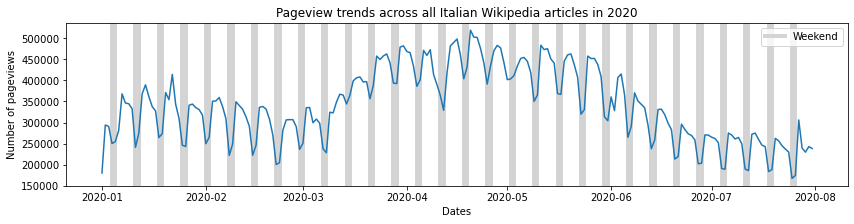

In [13]:
### ~ 4.1.2
plt.figure(figsize=(14,3))

# The dates of year 2020 are stored in ascending order within the index of pageviews_trends_2020 Series.
# Given the fact that 01/01/2020 is Wednesday and the week has 7 days, the operation "index modulo 7 = {3, 4}"
# releases the index of weekend days in the dataset. 
for i in range (len(pageviews_trends_2020.index)):
    if ((i % 7 == 3) or (i % 7 == 4)):
        if (i == 3):
            plt.axvline(pageviews_trends_2020.index[i], color='lightgrey', linewidth=3.9, label = "Weekend")
        else:
            plt.axvline(pageviews_trends_2020.index[i], color='lightgrey', linewidth=3.9)

plt.plot(pageviews_trends_2020)
plt.title('Pageview trends across all Italian Wikipedia articles in 2020')
plt.xlabel('Dates')
plt.ylabel('Number of pageviews')
plt.legend()
plt.show()

#### Implementation Notes

In order to remove this regular pattern, we decided to use the same technique as described in *Task 3.2.2*, which is the Seven Day Floating Average of pageviews. We observe from the following figure that this technique made the overall trend much clearer and smoother.

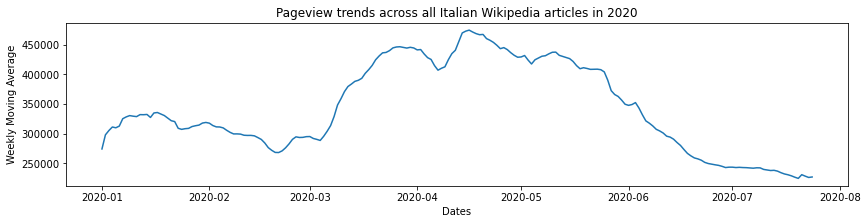

In [14]:
### ~ 4.1.3

# Calculate the Floating Average
pageviews_trends_2020_MA = pageviews_trends_2020.copy(True)
for i in range(len(pageviews_trends_2020) - 7):
    pageviews_trends_2020_MA[i] = (sum(pageviews_trends_2020[i + p] for p in range(7)) / 7)

# Exclude the last 7 days where we cannot calculate the Floating Average
pageviews_trends_2020_MA = pageviews_trends_2020_MA[0:len(pageviews_trends_2020) - 7]

plt.figure(figsize=(14,3))
plt.plot(pageviews_trends_2020_MA)
plt.title('Pageview trends across all Italian Wikipedia articles in 2020')
plt.xlabel('Dates')
plt.ylabel('Weekly Moving Average')
plt.show()

### **Task 4.2**

To get an even clearer picture, your task now is to compare the pageview time series of the current year (2020) with the time series of the previous year (2019).

1. Make a visualization where the two years are somehow "aligned", that is, where it is possible to compare the same time of year across the two years. Additionally, your visualization should highlight the date on which the nationwide lockdown started in Italy, 9 March 2020. Preprocess each one of the time series (for each year) the same way you did in Task 4.1.

3. **Discuss:** What changed from 2019 to 2020? Form and justify hypotheses about  the reasons behind this change.

---

**Hint**: In order to use two different y-axes in the same plot, you can use plt.twiny() or ax.twinx() (the latter if you are using the subplots environment;  [See this example](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/two_scales.html)).

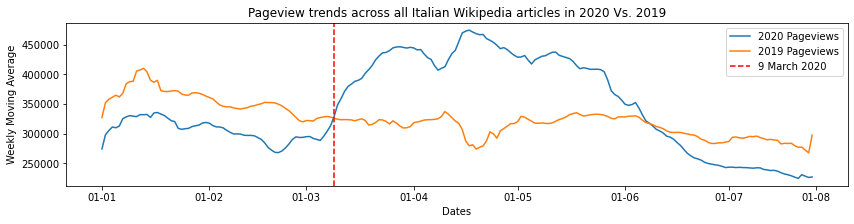

In [15]:
### ~ 4.2.1

# Drop 29 of February from 2020 pageviews dataset as it does not exists in 2019 (for alignment purposes)
pageviews_trends_2020_MA.drop(index = pd.to_datetime('2020-02-29 00:00:00'))

# Calculate the summed pageviews trends across all articles of the year 2019, according to the available months of 2020 for which we have measurements
time_period = ((articles_date_columns.columns >= pd.to_datetime('2019-01-01 00:00:00')) 
               & (articles_date_columns.columns <= pd.to_datetime('2019-07-31 00:00:00')))
date_columns_2019 = articles_date_columns.columns[time_period]
pageviews_trends_2019 = articles[date_columns_2019].sum(axis=0)

# Calculate the Floating Average
pageviews_trends_2019_MA = pageviews_trends_2019.copy(True)
for i in range(len(pageviews_trends_2019) - 7):
    pageviews_trends_2019_MA[i] = (sum(pageviews_trends_2019[i + p] for p in range(7)) / 7)
    
# Exclude the last 7 days where we cannot calculate the average
pageviews_trends_2019_MA = pageviews_trends_2019_MA[0: len(pageviews_trends_2020) - 7]

# Calculate a common x-axis for the figure by removing the year of pageviews
period_in_months_days = [date.strftime('%d-%m') for date in pageviews_trends_2019_MA.index.date]

fig, ax = plt.subplots(figsize=(14, 3))
plt.plot(period_in_months_days, pageviews_trends_2020_MA.values, label='2020 Pageviews')
plt.plot(period_in_months_days, pageviews_trends_2019_MA.values, label='2019 Pageviews')
plt.axvline('09-03', label='9 March 2020', c='r', ls='--')
plt.xlabel('Dates')
plt.ylabel('Weekly Moving Average')
ax.xaxis.set_ticks(['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08'])
plt.title('Pageview trends across all Italian Wikipedia articles in 2020 Vs. 2019')
plt.legend()
plt.show()

### Discussion ~ 4.2.2

From the previous figure we observe that 9 March 2020 is the "key" date from which the number of pageviews in 2020 surpassed the corresponding in 2019 and then increased significantly. This is a reasonable outcome as 09/03/2020 is the day where the nationwide lockdown took place in Italy. During the lockdown people in Italy probably spent a lot of time to inform themselves about different viruses as we previously observed in *Task 3.2.2*. Another interesting fact is that the lockdown generated a 5.37% increase in the number of total pageviews from 2019 to 2020 for the examined time period. Although, this metric must be used with caution as we only examine a subset of Italian Wikipedia articles. 

In [16]:
### ~ 4.2.2
pageviews_trends_2020_Feb = pageviews_trends_2020.copy(True)
pageviews_trends_2020_Feb.drop(index = pd.to_datetime('2020-02-29 00:00:00'))

percentage = 100 * (pageviews_trends_2020_Feb.sum() - pageviews_trends_2019.sum()) / pageviews_trends_2019.sum()
print("Percentage increase in total pageviews from 2019 to 2020 = ", percentage)

Percentage increase in total pageviews from 2019 to 2020 =  5.371495237757698


## *Step 5*: Fiddling with Topics

---
### **Task 5.1**

We now turn to a different question: what topics were impacted by the lockdown? 
To start unpacking this question, your task now is to aggregate, for each day, all pageviews that went to each one of the 64 topics. 

There are multiple ways to do this, but for the sake of this exercise, you must create a dataframe where each row contains the number of pageviews a topic obtained on a given day! Example:

~~~
index       date                   views             
TOPIC1      2019-01-01             101              
TOPIC1      2019-01-02             151             
(...)       (...)                  (...)
TOPICK      2019-01-01             1010              
TOPICK      2019-01-02             2123            
(...)       (...)                  (...)
~~~

---

**Hint**: You've should find a way to make the index in the dataframe with the topics be the same as the index in the dataframes with the articles. See the file `mapping.pickle`.

**Hint**: You may want to use `.melt`.

#### Implementation notes

In order to build the dataframe in the example above, we proceeded as follows:
- we used the mapping dictionary (`mapping.pickle`) to add a column to `topics` containing the Italian translation of the titles
- we used the added column to merge `topics` and `articles` and therefore store all the information from the dates and topics in one dataframe (this could have been done also only at a later stage, however, we preferred to already standardize the articles and only `.melt` the matched titles)
- two unpivoted dataframes have been made to store information respectively about topics and dates row-wise for each title. Only the rows containing a topic (where the topic row was True) have been kept
- we merged the two unpivoted dataframes back together
- we aggregated the information by grouping on (`topic`, `date`) and sum the `daily_pv` (the count of pageviews by date and by topic)

In [17]:
### ~ 5.1.1
### Your code here! ###
articles = articles.drop(columns=['sum_pageview'])

# Added mapping to Italian 
topics['mapping'] = topics.index.map(mapping) 

topic_names = topics.columns[topics.columns != 'mapping']
dates = articles.columns

topics_pageviews = pd.merge(articles, topics, left_index=True, right_on='mapping') 

# Unpivoted the information on both dates and topic names
pv_topics = topics_pageviews.melt(id_vars='mapping', value_vars=list(topic_names), var_name='topic')
pv_dates = topics_pageviews.melt(id_vars='mapping', value_vars=list(dates), var_name='date', value_name='daily_pv') 
pv_topics = pv_topics[pv_topics['value']] # Maintained only the topics that related to the article 

In [18]:
topics_pageviews = pd.merge(pv_topics, pv_dates, on='mapping')

# Grouping the data on the topic and the date, aggregating the number of views of each topic each day
topics_pageviews_ = topics_pageviews[['topic',  'date', 'daily_pv']].groupby(
    [topics_pageviews['topic'], topics_pageviews['date']]
).sum().reset_index()
topics_pageviews_ 

,topic,date,daily_pv
0,Culture.Biography.Biography*,2018-01-01,58085
1,Culture.Biography.Biography*,2018-01-02,86933
2,Culture.Biography.Biography*,2018-01-03,88693
3,Culture.Biography.Biography*,2018-01-04,94648
4,Culture.Biography.Biography*,2018-01-05,90808
...,...,...,...
60347,STEM.Technology,2020-07-27,11507
60348,STEM.Technology,2020-07-28,11023
60349,STEM.Technology,2020-07-29,11131
60350,STEM.Technology,2020-07-30,12406


In [19]:
# As sanity check, let's make sure the topics are 64 and the days are about 3 years
topics_pageviews_.topic.nunique(), topics_pageviews_.date.nunique()

(64, 943)

### **Task 5.2**

Now to the **grand finale**. We will consider two periods:
- the 35 days before the quarantine started (in the 9th of March); and 
- the 34 days after the quarantined started (including the day of the quarantine itself).

Create a visualization where you can compare, for each topic, the mean **number of views** in the aforementioned periods (that is, before and after the quarantine started). **Although there is a very large number of topics, your visualization should be a compact panel, small enough to fit on an A4 page.**

---

**Hint**: [Hoooray](https://seaborn.pydata.org/examples/index.html).

#### Implementation notes

In order to select the dates before and after the quarantine we compared the date column to datetime objects with the dates of interest. Inintially, for clarity, we made two separate dataframes (one containing the dates before and one after the lockdown), added a column `type` that specifies whether the date is before or after the lockdown and finally concatenated the two.


In [20]:
### ~ 5.2
### Your code here! ###
mask_before = ((topics_pageviews_.date >= pd.to_datetime('2020-03-09 00:00:00') - pd.to_timedelta('35 days'))
        & (topics_pageviews_.date < pd.to_datetime('2020-03-09 00:00:00')))
before = topics_pageviews_.loc[mask_before]
before.insert(0, 'type', 'before')


mask_after = ((topics_pageviews_.date >= pd.to_datetime('2020-03-09 00:00:00'))
        & (topics_pageviews_.date < pd.to_datetime('2020-03-09 00:00:00') + pd.to_timedelta('34 days')))
after = topics_pageviews_.loc[mask_after]
after.insert(0, 'type', 'after')


before_after = pd.concat([before, after])
before_after

,type,topic,date,daily_pv
763,before,Culture.Biography.Biography*,2020-02-03,79655
764,before,Culture.Biography.Biography*,2020-02-04,77799
765,before,Culture.Biography.Biography*,2020-02-05,84195
766,before,Culture.Biography.Biography*,2020-02-06,80031
767,before,Culture.Biography.Biography*,2020-02-07,69623
...,...,...,...,...
60236,after,STEM.Technology,2020-04-07,24347
60237,after,STEM.Technology,2020-04-08,24576
60238,after,STEM.Technology,2020-04-09,21289
60239,after,STEM.Technology,2020-04-10,18819


#### Implementation notes

In order to compare the **mean** number of views of the aforementioned periods we decided to use **boxplots** displaying the mean. This choice was motivated both by our intent to encode the information as compactly as possible (in 8.3x11.7 inches) and by our desire to reasonably compare between the two values for each topic. 

Using the boxplots we were able to clearly see and compare the mean and to get an understanding of the minimum, the maximum, the upper and the lower quartiles (which are useful for a more thorough comparison). Unfortunately, since we preferred to highlight the mean, the median is often not visible in the plots. 

In terms of the implementation, the `seaborn boxplot` function was used with the parameter `showmeans` to include the mean value in the plot. A cumbersome iteration over the artists was made to color the mean dot with the same color as the box color. Finally, the boxplot is displayed using **log** xaxis. This was motivated by the fact that quite a lot of topic have a very low number of pageviews while some have extremely high numbers (in the order of 100'000). The implementation of the log axis allowed us to better discern among the topics with low numbers of pageviews. The biggest disadvantage of this choice is that we dicreased the understanding of the change of magnitude between topics and types. 


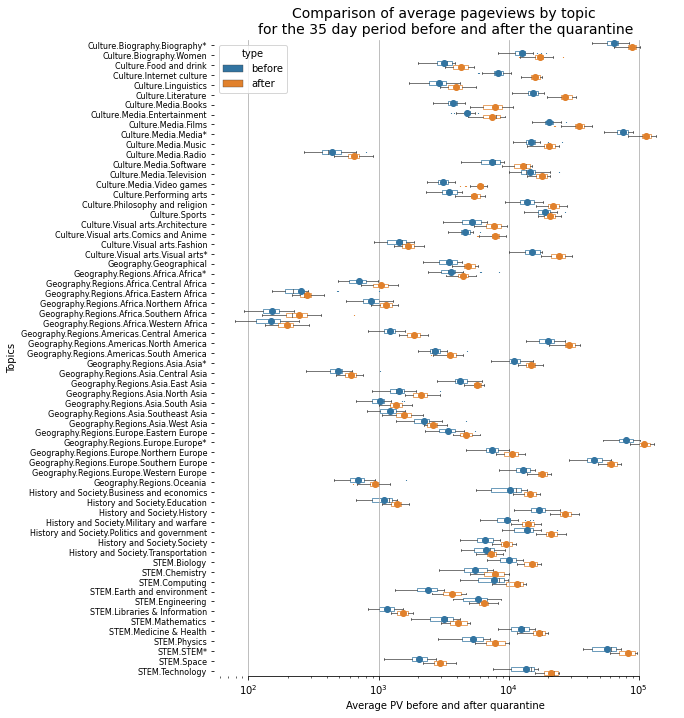

In [21]:
import seaborn as sns
plt.figure(figsize=(8.3,11.7)) # change this if needed: has be adapted to A4 size

# Plotting the topics by type using horizontal boxplots showing the mean
ax = sns.boxplot(x='daily_pv', y='topic', hue='type',
                 data=before_after, linewidth=0.7, fliersize=0.3, 
                 showmeans=True, meanprops={'marker':'o', 'markeredgecolor':'black'})

# Coloring the means with the same colors as the boxes
num_artists = len(ax.artists)
num_lines = len(ax.lines)
lines_per_topic = num_lines // num_artists
for i, artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')
    for j in range(lines_per_topic):
        ax.lines[i * lines_per_topic + j].set_markerfacecolor(col)
        ax.lines[i * lines_per_topic + j].set_markeredgecolor(col)


# Tweaking the visual representation
ax.set_title('Comparison of average pageviews by topic \nfor the 35 day period before and after the quarantine', fontsize=14)
ax.xaxis.grid(True)
ax.set_xlabel('Average PV before and after quarantine', fontsize=10)
ax.set_ylabel('Topics', fontsize=10)
[tick.set_fontsize(8) for tick in ax.get_yticklabels()]
ax.set_xscale("log")
sns.despine(trim=True, left=True)
#add explanation of what anything in the boxplots stands for

plt.show()

### **Task 5.3**

Notice that the previous analysis fails to isolate the increases or decreases in each individual topic from the overall increases or decreases in pageviews across Wikipedia in general. That is, it could be that all topics gained/lost pageviews, but some did so more than articles in general, while others did so less than articles in general. To address this issue, you should:


1. Normalize the pageviews counts in the dataframe created in Task 5.1. Instead of using the raw number of pageviews, you should compute, for each day, what fraction of all pageviews a topic received.

2. Create a second visualization that shows not the **raw** value of pageviews before and after, but the **relative** value that you just calculated.

3. **Discuss:** According to Task 5.2, what topics have increased in terms of the raw, absolute number of pageviews after the quarantine started? In relative, rather than absolute, terms, do these findings still hold? If not, what has changed?

---

#### Implementation notes

In order to normalize the count, we computed the total pageviews per day and we divided the page view of each topic of each day by the total pageviews of each day. 

In [22]:
### ~ 5.3.1
### Your code here! ###
before_after = pd.merge(before_after, before_after.groupby('date').sum(), on='date', how='left')
before_after['rel_pv_count'] = before_after['daily_pv_x'] / before_after['daily_pv_y']

before_after

,type,topic,date,daily_pv_x,daily_pv_y,rel_pv_count
0,before,Culture.Biography.Biography*,2020-02-03,79655,844551,0.094316
1,before,Culture.Biography.Biography*,2020-02-04,77799,855116,0.090981
2,before,Culture.Biography.Biography*,2020-02-05,84195,889337,0.094672
3,before,Culture.Biography.Biography*,2020-02-06,80031,843794,0.094847
4,before,Culture.Biography.Biography*,2020-02-07,69623,749002,0.092954
...,...,...,...,...,...,...
4411,after,STEM.Technology,2020-04-07,24347,1146844,0.021230
4412,after,STEM.Technology,2020-04-08,24576,1154042,0.021296
4413,after,STEM.Technology,2020-04-09,21289,1007639,0.021128
4414,after,STEM.Technology,2020-04-10,18819,976985,0.019262


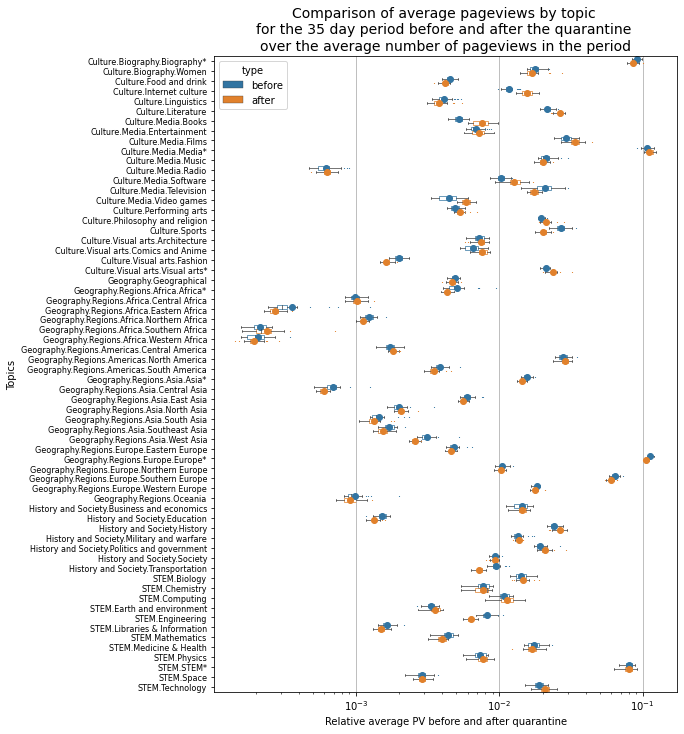

In [25]:
### ~ 5.3.2
### Your code here! ###

plt.figure(figsize=(8.3,11.7)) # change this if needed: has be adapted to A4 size

# Plotting the topics by type using horizontal boxplots showing the mean
ax = sns.boxplot(x='rel_pv_count', y='topic', hue='type',
                 data=before_after, linewidth=0.7, fliersize=0.3,
                showmeans=True, meanprops={'marker':'o', 'markeredgecolor':'black'})

# Coloring the means with the same colors as the boxes
num_artists = len(ax.artists)
num_lines = len(ax.lines)
lines_per_topic = num_lines // num_artists
for i, artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')
    for j in range(lines_per_topic):
        ax.lines[i * lines_per_topic + j].set_markerfacecolor(col)
        ax.lines[i * lines_per_topic + j].set_markeredgecolor(col)

# Tweaking the visual representation
ax.set_title('Comparison of average pageviews by topic \nfor the 35 day period before and after the quarantine \nover the average number of pageviews in the period', fontsize=14)
ax.xaxis.grid(True)
ax.set_xlabel('Relative average PV before and after quarantine', fontsize=10)
ax.set_ylabel('Topics', fontsize=10)
[tick.set_fontsize(8) for tick in ax.get_yticklabels()]
ax.set_xscale("log")

### Discussion ~ 5.3.3

In the raw plot, all topics witnessed an increase in pageviews after the lockdown. In this second plot, we can see that the relative amount of pageviews by topic are significantly more similar than they appreared in the first plot. In fact, the understandable general increase in Wikipedia use during quarantine had made the two amounts less comparable. 

In the relative plot, most topics exhibit the same support for the two periods. The interesting cases are of growth during quarantine are:
- Culture: Internet culture
- Culture: Literature
- Culture: Media books
- Culture: Media films
- Culture: Media television
- Culture visual arts: Comics and Anime (probably a long stretch, but we believe that the popularity of vignettistica was increased by the great success of Zerocalcare's videos during the quarantine)

These growths are significant even in the normalized plot, demonstrating that the #stayingathome normatives have induced people to seek information about at home leisures to fill their time. 

In terms of decrease, no topic exhibits a substantial change. Some geography related topics seem to have lower support compared to the general trend. This is probably due to people traveling less and therefore needing less information about places to visit. The same reasoning applies to the subtle decrease in History and Society: Transportation. Culture: Sports also witnessed a decrease in interest, probably as all sports related events were cancelled. 

---